# Analytics Technology Map V1

## Imports

In [185]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import datetime
import sqlite3
import pdb
import time
import pandas as pd
import numpy as np
import ast
import json
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

conn = sqlite3.connect('C:\\MeinCode\\reddit_scraper\\reddit.db')
#conn = sqlite3.connect(':memory:')

curs = conn.cursor()

## Get and preprocess our Data

In [186]:
# Get data from my SQLite database
with conn:
    curs.execute("""
                SELECT id, tech_list
                FROM techs_extracted_v2
                """)
all_content = curs.fetchall()

# Since our technologies sometimes consist of more than one word, I am replacing whitespace with underscore
# "Apache Storm" -> "Apache_Storm"
# literal_eval makes makes a python list out of the string "['abc','cde']" -> ['abc', 'cde']
def underscore(all_content):
    return_content = []
    for _, content in all_content:
        content = ast.literal_eval(content)
        underscore_content = []
        for tech in content:
            underscore_content.append(tech.replace(" ", "_"))
        return_content.append(underscore_content)
    return return_content

In [187]:
all_content = underscore(all_content)

In [188]:
# The information of how many posts and comments am I using?
len(all_content)

21839

## Defining Plotting functions

In [195]:
# Use t-sne to visualize embeddings that are in larger dimensions in 2D
# Mainly copied from here: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model, perplexity=40):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    fig = plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    return fig

In [196]:
# Visualize the word embeddings directly --- Embedding  must be in 2D
# Mainly copied from here: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def plot_wordvectors(model):
    #To do: Write test to verify the embedding is not in a higher dimensionality than 2D
        
    labels = []
    x = []
    y = []
    for word in model.wv.vocab:
        labels.append(word)
        x.append(model[word][0])
        y.append(model[word][1])

        
    fig = plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    return fig

## Define settings for model and vizualization and plot

### Word embedding Dimensionality = 2

C:\MeinCode\Anaconda\envs\reddit_scraper\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
C:\MeinCode\Anaconda\envs\reddit_scraper\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


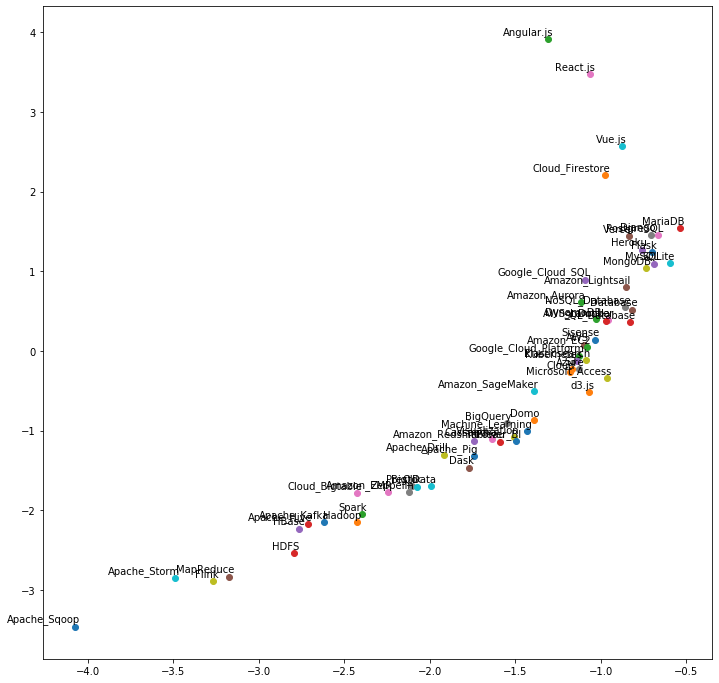

In [191]:
size=2
iterations = 100

model = Word2Vec(all_content, size=size, iter=iterations, workers=3)
fig = plot_wordvectors(model)
fig.savefig('Visualizations\\t-sne-v2\\2d_word_vectors_iter={0}.png'.format(iterations), transparent=True, dpi=300, bbox_inches="tight")


### Word embedding Dimensionality > 2

C:\MeinCode\Anaconda\envs\reddit_scraper\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


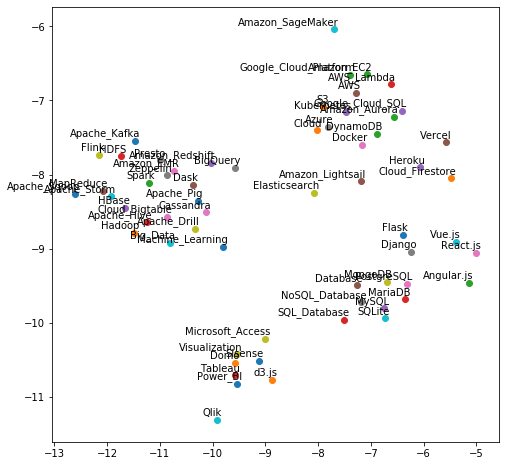

In [204]:
size=3
iterations = 50
perplex= 30

model = Word2Vec(all_content, size=size, iter=iterations, workers=3)
fig = tsne_plot(model, perplexity=perplex)
fig.savefig('Visualizations\\t-sne-v2\\t-sne_size={0}_iter={1}_perplexity={2}.png'.format(size, iterations, perplex), transparent=True, dpi=300, bbox_inches="tight")


In [194]:
# Test, how accurate 2D visualization of the high-dimensional embedding is
# If the most similar technologies are the ones closest on the visualization, the vizualization appears accurate
model.most_similar('Docker')

C:\MeinCode\Anaconda\envs\reddit_scraper\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('DynamoDB', 0.9902461767196655),
 ('Amazon_Aurora', 0.9891820549964905),
 ('AWS', 0.9794842600822449),
 ('Amazon_EC2', 0.9767917990684509),
 ('AWS_Lambda', 0.9722397923469543),
 ('Google_Cloud_SQL', 0.963776171207428),
 ('Google_Cloud_Platform', 0.9636991024017334),
 ('Kubernetes', 0.9578285217285156),
 ('S3', 0.9563072919845581),
 ('Azure', 0.9517725706100464)]